In [3]:

from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
#from scipy.stats import signaltonoise
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit

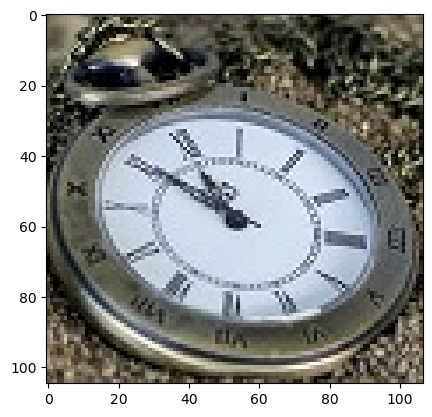

(<matplotlib.image.AxesImage at 0x7fb8272b3b50>, None)

In [4]:
im = Image.open("./clock.jpg") # the original small clock image
pylab.imshow(im), pylab.show()

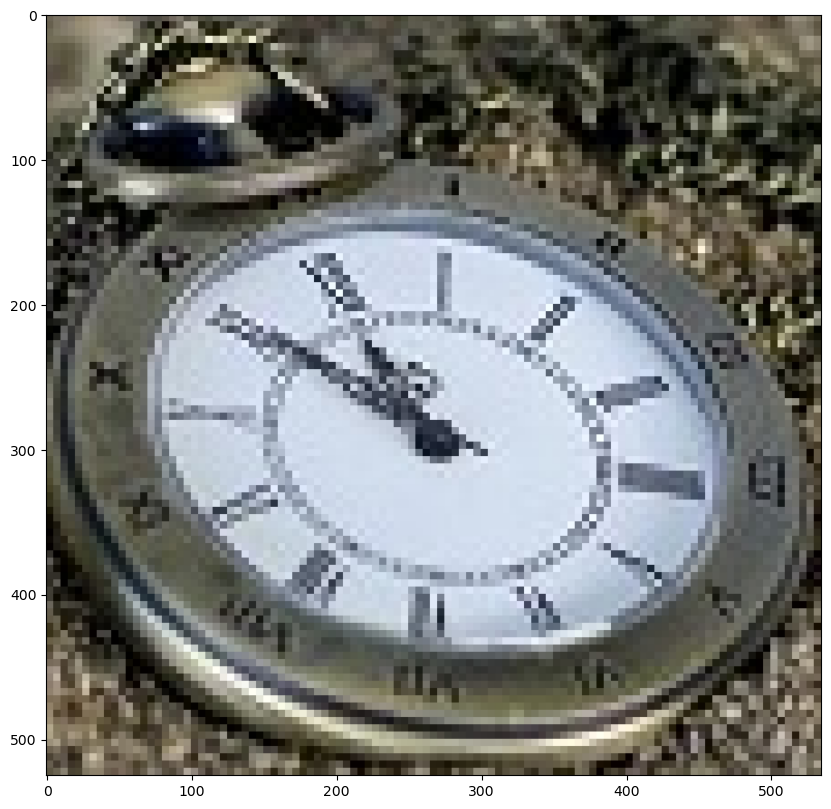

(<Figure size 1000x1000 with 1 Axes>,
 None)

In [5]:
im1 = im.resize((im.width*5, im.height*5), Image.NEAREST) # nearest neighbor interpolation
pylab.figure(figsize=(10,10)), pylab.imshow(im1), pylab.show()


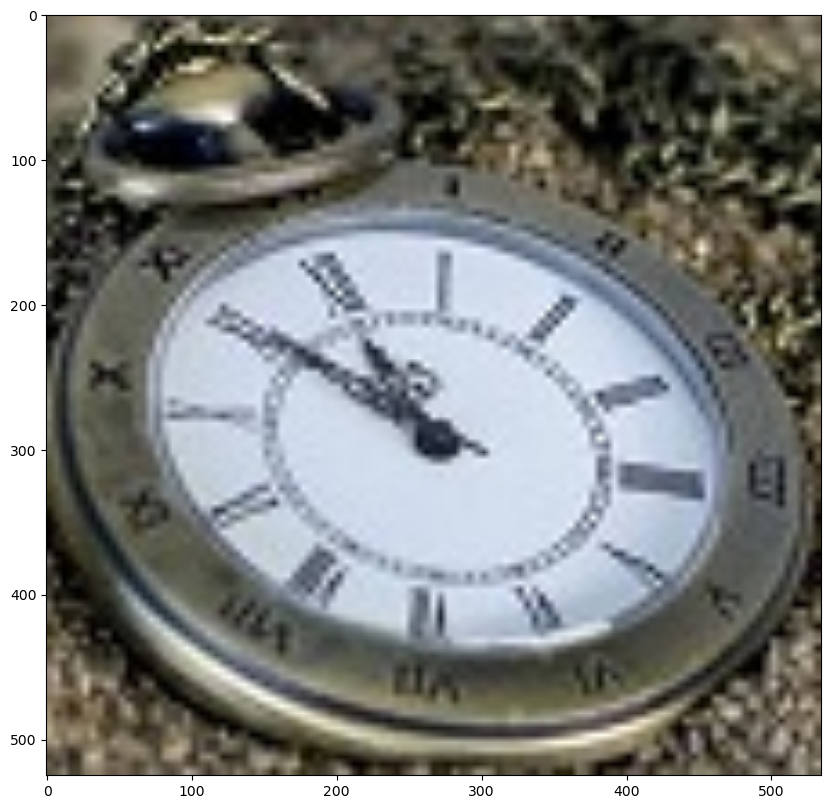

(<Figure size 1000x1000 with 1 Axes>,
 None)

In [6]:
im1 = im.resize((im.width*5, im.height*5), Image.BILINEAR) # up-sample with bi-linear interpolation
pylab.figure(figsize=(10,10)), pylab.imshow(im1), pylab.show()

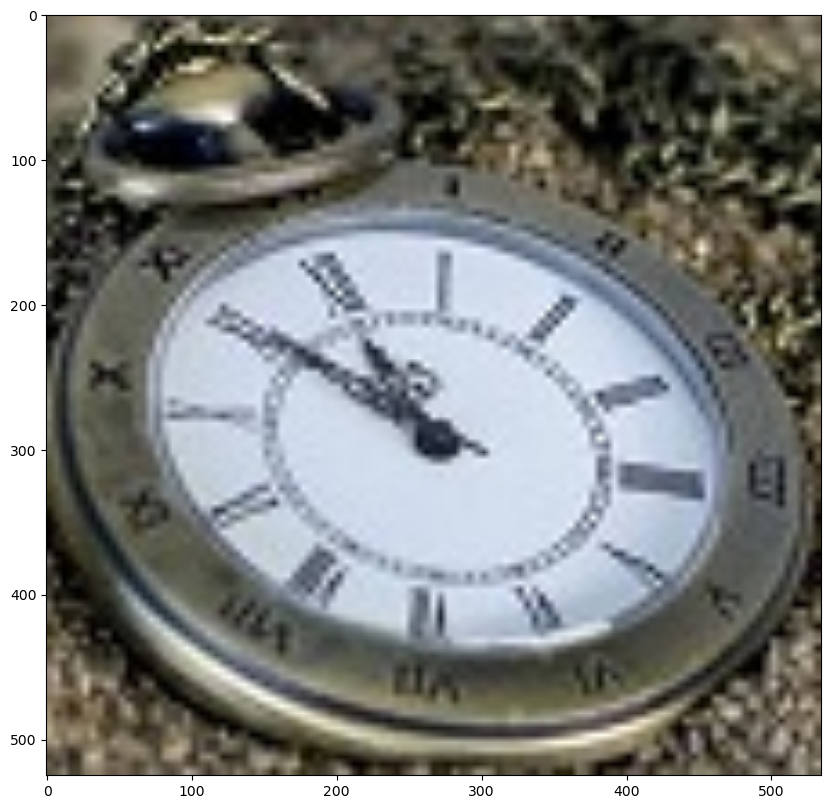

(<Figure size 1000x1000 with 1 Axes>,
 None)

In [7]:
im.resize((im.width*10, im.height*10), Image.BICUBIC).show() # bi-cubic interpolation
pylab.figure(figsize=(10,10)), pylab.imshow(im1), pylab.show()

In [8]:
im = Image.open("./tajmahal.jpg")
im.show()

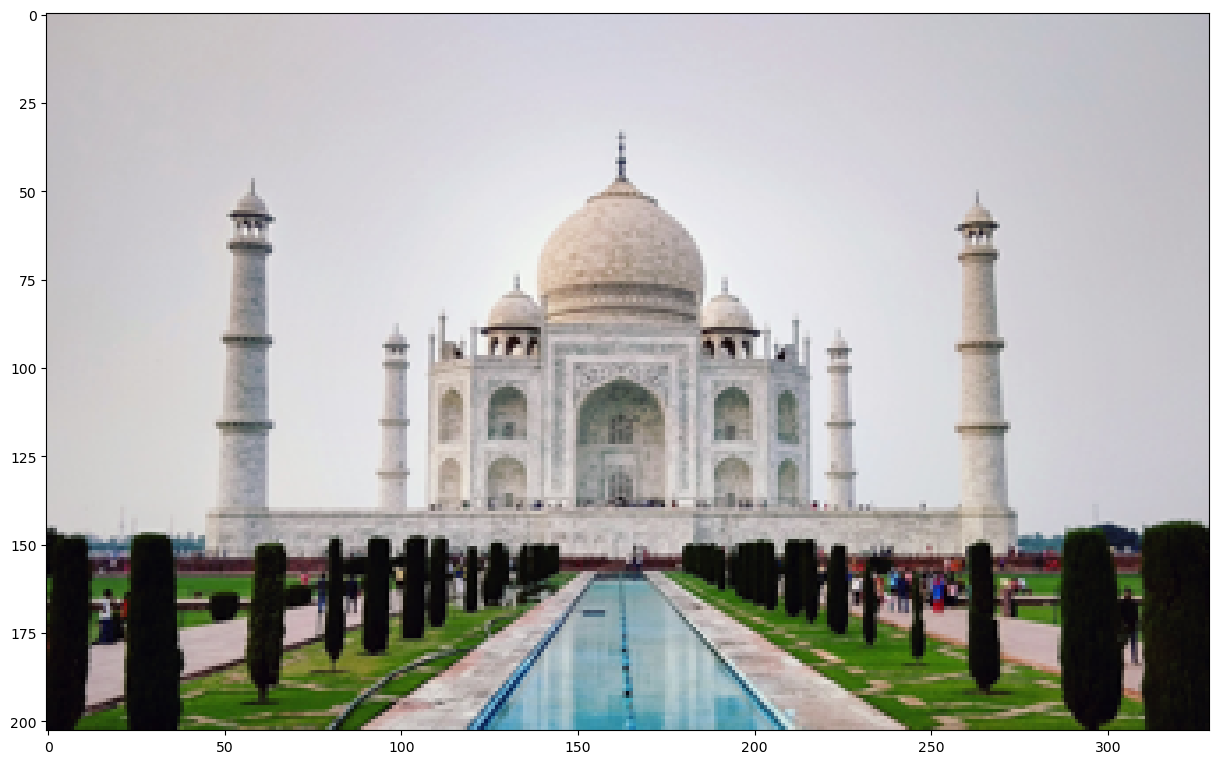

(<Figure size 1500x1000 with 1 Axes>,
 None)

In [9]:
im = im.resize((im.width//5, im.height//5))
pylab.figure(figsize=(15,10)), pylab.imshow(im), pylab.show()

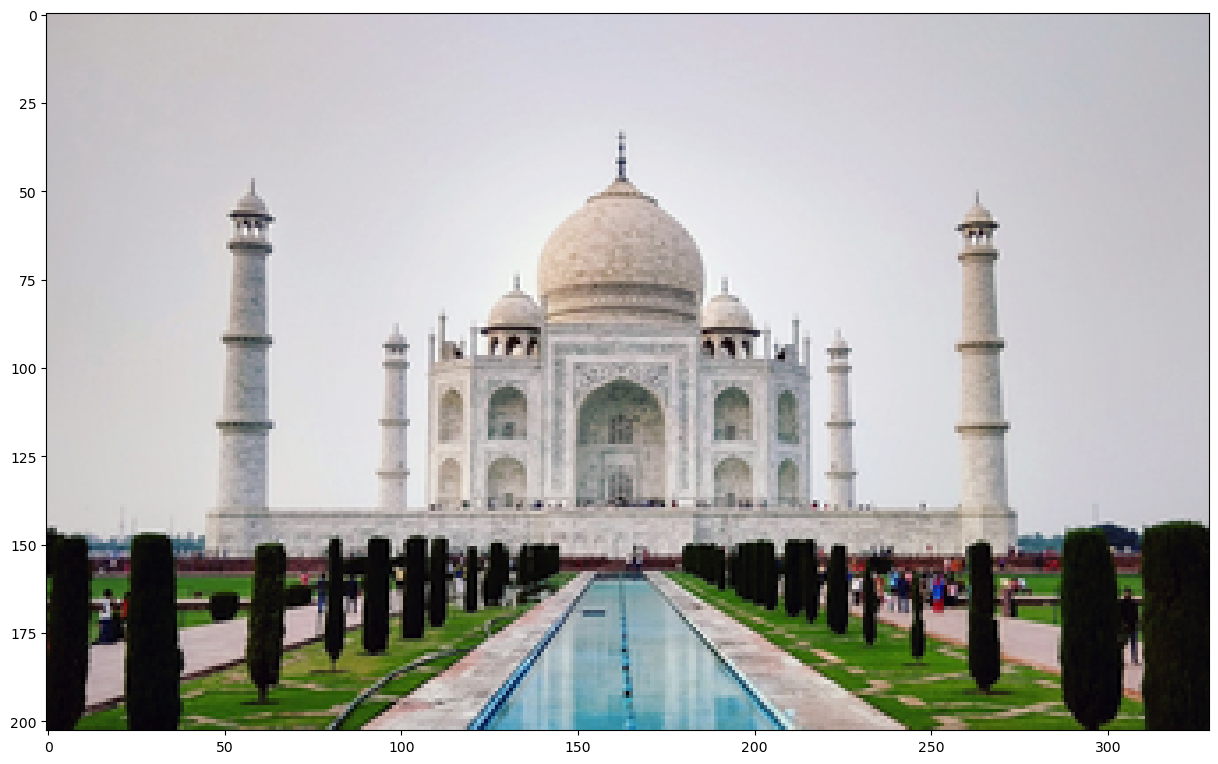

(<Figure size 1500x1000 with 1 Axes>,
 None)

In [10]:
im = Image.open("./tajmahal.jpg")
im = im.resize((im.width//5, im.height//5), Image.ANTIALIAS)
pylab.figure(figsize=(15,10)), pylab.imshow(im), pylab.show()

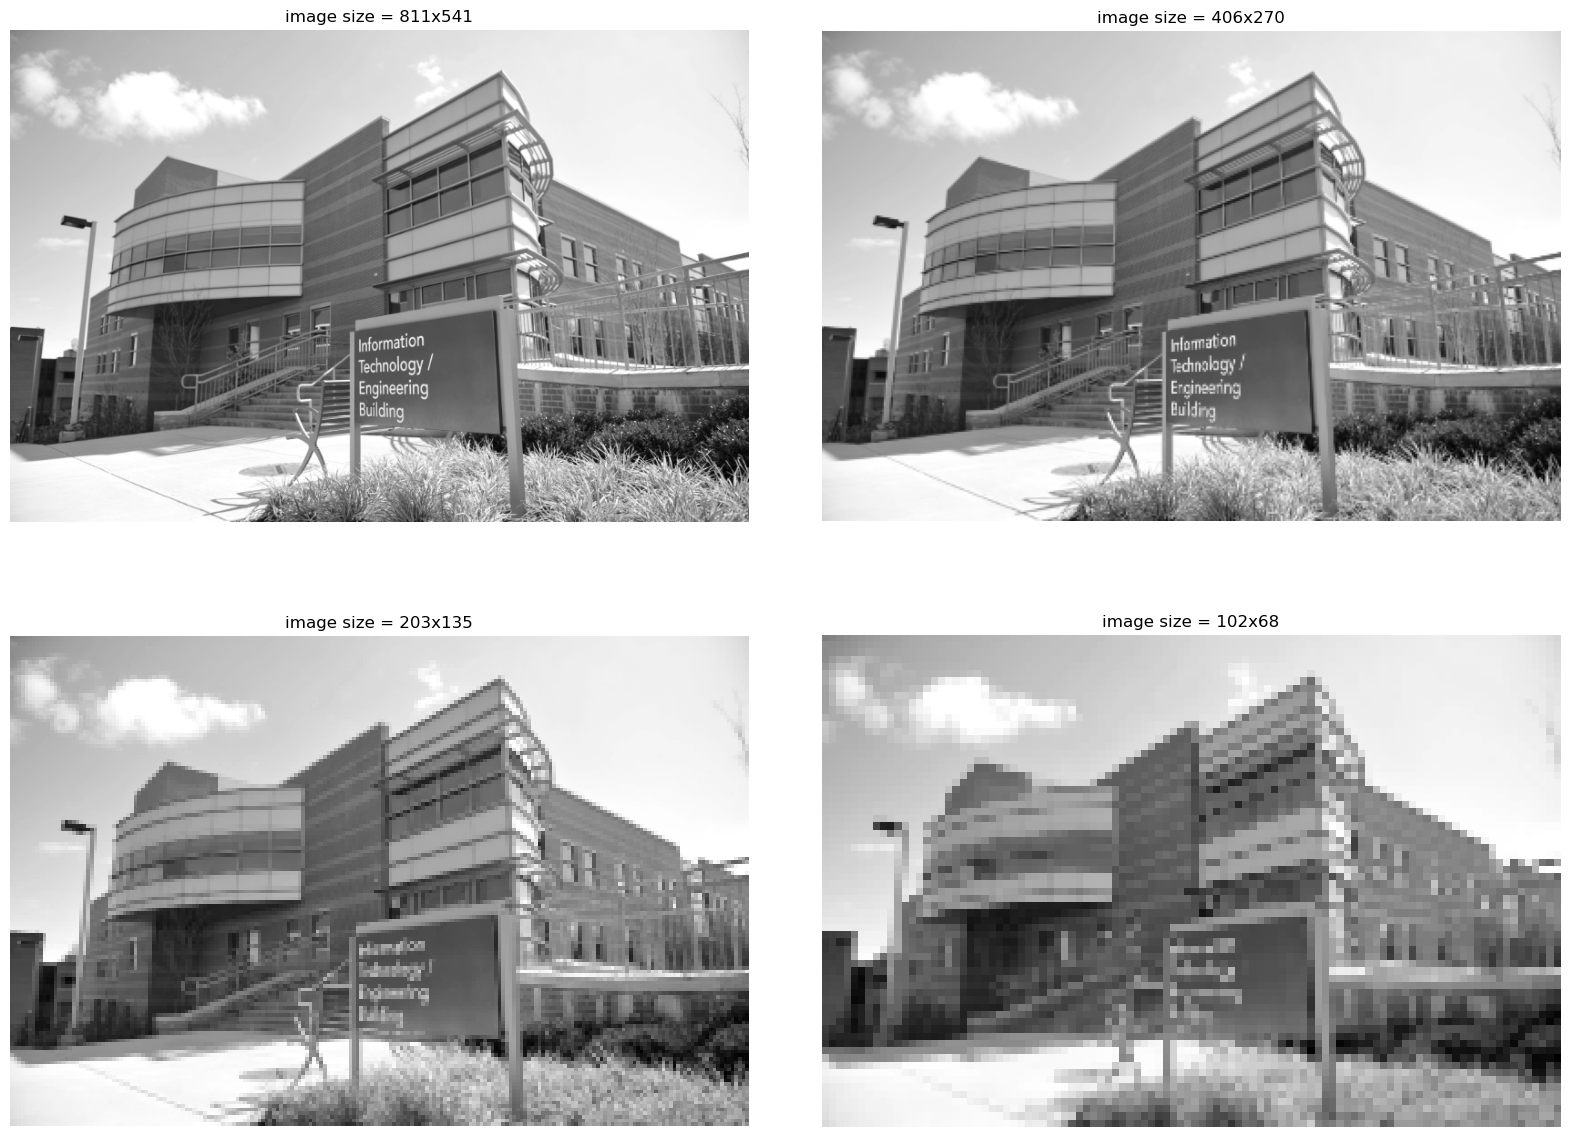

In [14]:
import pylab
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import rescale

im = imread('./umbc.png')
im_gray = rgb2gray(im) 
im1 = im_gray.copy()
pylab.figure(figsize=(20,15))
for i in range(4):
    pylab.subplot(2,2,i+1), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
    pylab.title('image size = ' + str(im1.shape[1]) + 'x' + str(im1.shape[0]))
    im1 = rescale(im1, scale = 0.5, anti_aliasing=False)
pylab.subplots_adjust(wspace=0.1, hspace=0.1)
pylab.show()

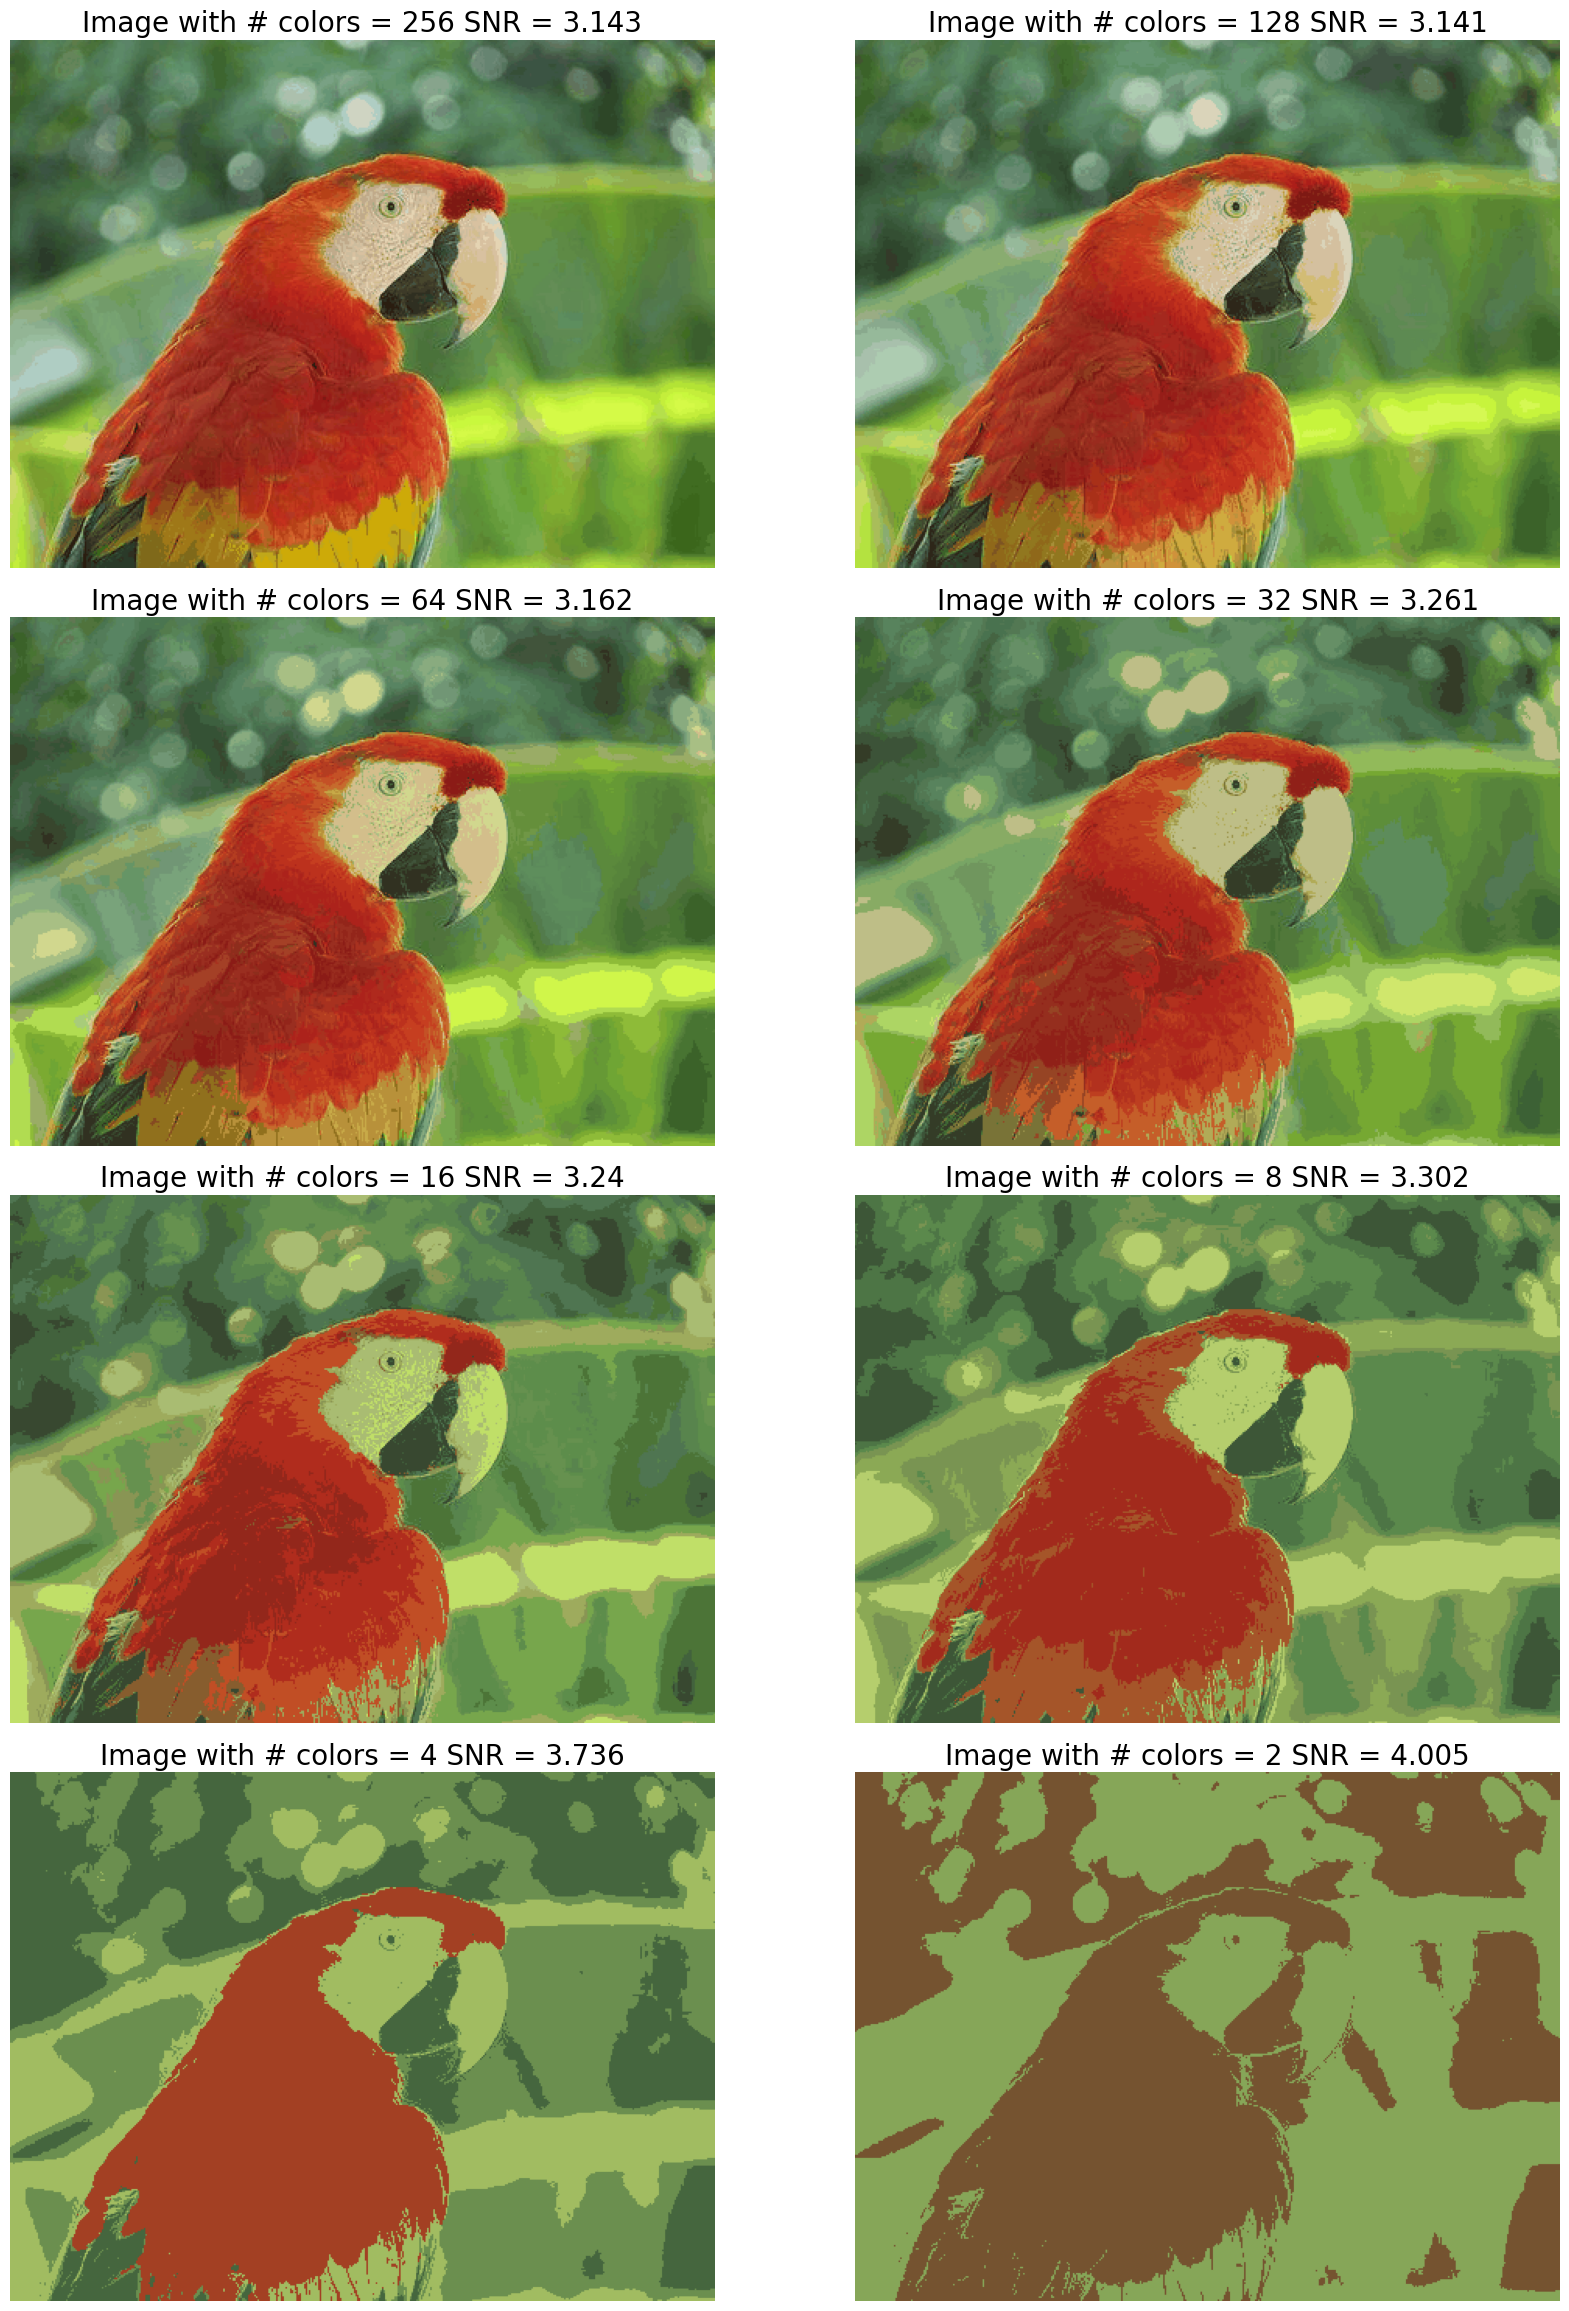

In [20]:
import pylab
import numpy as np
from PIL import Image
from scipy.signal import find_peaks
from skimage.metrics import structural_similarity as ssim

def calculate_snr(image):
    # Convert the image to grayscale
    gray_image = image.convert('L')
    
    # Calculate the SNR using NumPy
    signal = np.mean(gray_image)
    noise = np.std(gray_image)
    snr = signal / noise
    
    return snr

im = Image.open('./parrot.jpg')
pylab.figure(figsize=(20, 30))
num_colors_list = [1 << n for n in range(8, 0, -1)]
snr_list = []
i = 1

for num_colors in num_colors_list:
    im1 = im.convert('P', palette=Image.ADAPTIVE, colors=num_colors)
    pylab.subplot(4, 2, i), pylab.imshow(im1), pylab.axis('off')
    snr = calculate_snr(im1)
    snr_list.append(snr)
    pylab.title('Image with # colors = ' + str(num_colors) + ' SNR = ' +
                str(np.round(snr_list[i - 1], 3)), size=20)
    i += 1

pylab.subplots_adjust(wspace=0.2, hspace=0)
pylab.show()


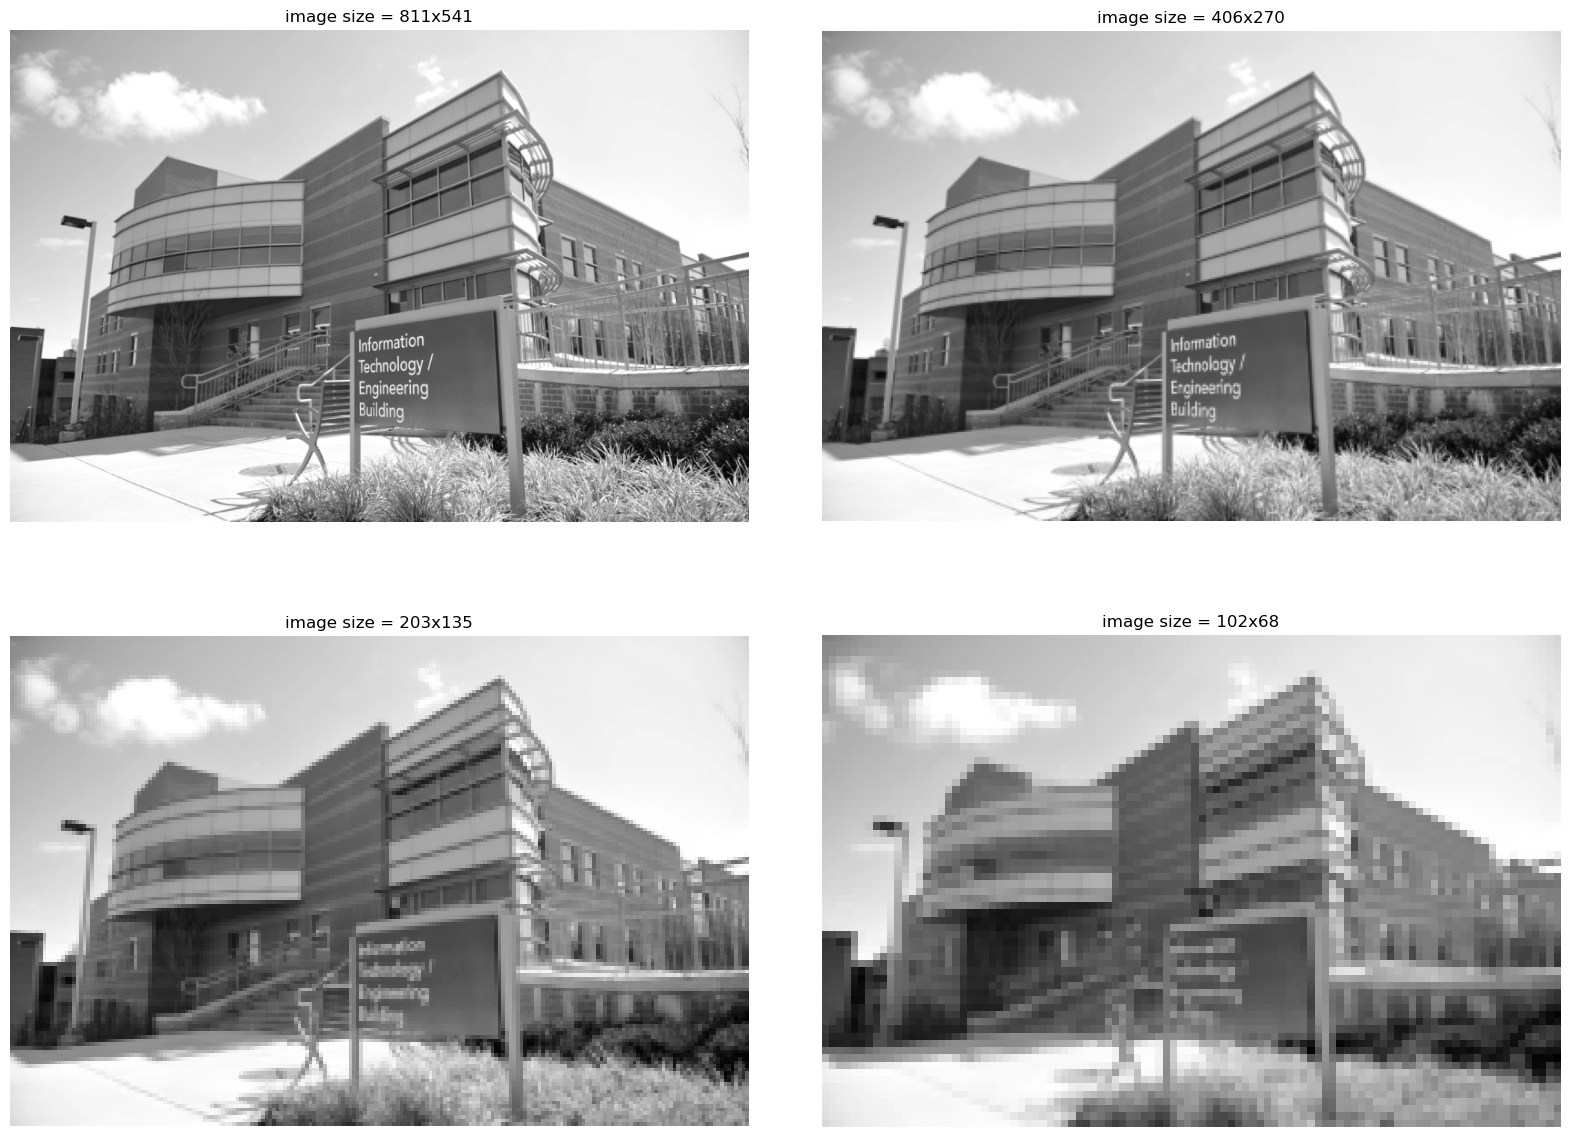

In [23]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import rescale
import pylab

# Load the color image
im = imread('./umbc.png')

# Convert the color image to grayscale
im1 = rgb2gray(im)

pylab.figure(figsize=(20, 15))
for i in range(4):
    pylab.subplot(2, 2, i + 1), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
    pylab.title('image size = ' + str(im1.shape[1]) + 'x' + str(im1.shape[0]))
    im1 = rescale(im1, scale=0.5, anti_aliasing=True)##
pylab.subplots_adjust(wspace=0.1, hspace=0.1)
pylab.show()

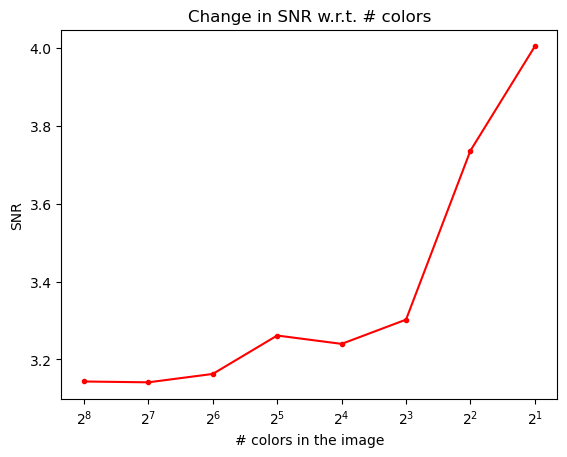

In [26]:
import matplotlib.pyplot as plt
import numpy as np
pylab.plot(num_colors_list, snr_list, 'r.-')
pylab.xlabel('# colors in the image')
pylab.ylabel('SNR')
pylab.title('Change in SNR w.r.t. # colors')
pylab.xscale('log', base=2) #basex is written as base
pylab.gca().invert_xaxis()
pylab.show()

/usr/local/lib/python3.10/dist-packages/skimage/metrics/simple_metrics.py:163: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)
/tmp/ipykernel_5183/969434271.py:23: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  snr_reconstruction = peak_signal_noise_ratio(im, im1)


SNR for the original image = inf
SNR for the image obtained after reconstruction = 309.2786935632994


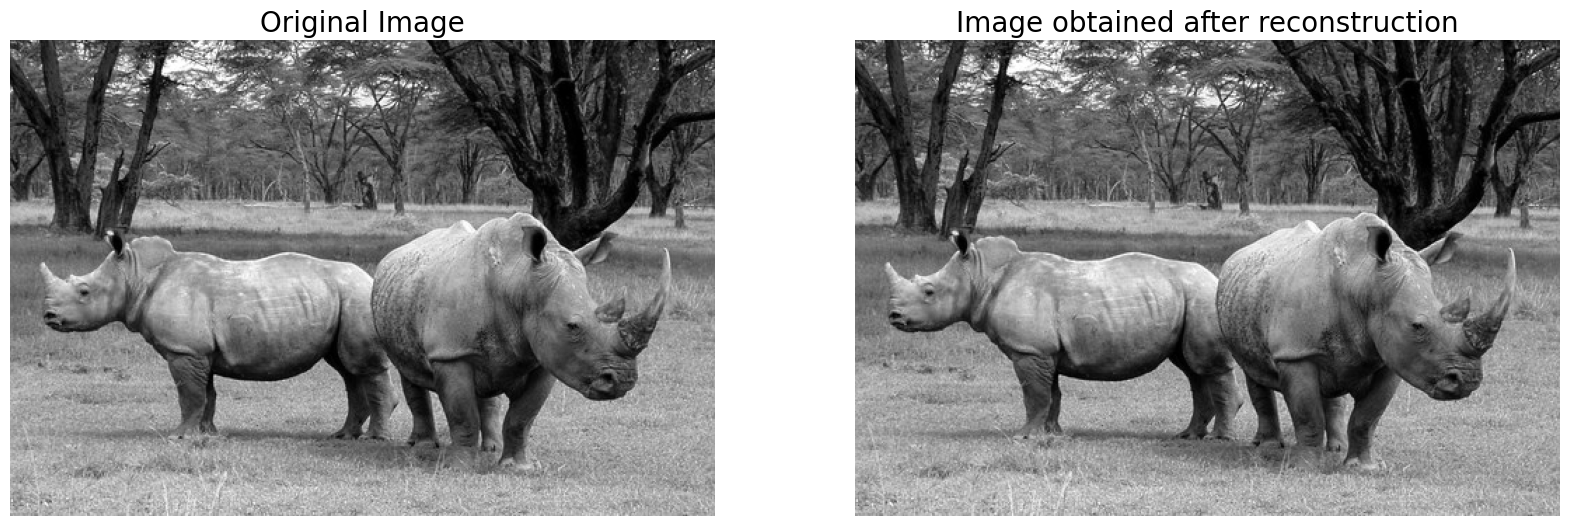

In [34]:
from PIL import Image
import numpy as np
from scipy.fft import fft2, ifft2
from skimage.metrics import peak_signal_noise_ratio
import matplotlib.pyplot as plt

# Load the image using Pillow (PIL)
im = Image.open('./rhino.jpg').convert('L')  # Convert to grayscale

# Convert the PIL image to a NumPy array
im = np.array(im)

# Calculate SNR for the original image
snr_original = peak_signal_noise_ratio(im, im)

print('SNR for the original image =', snr_original)

# Perform FFT and IFFT
freq = fft2(im)
im1 = ifft2(freq).real

# Calculate SNR for the image obtained after reconstruction
snr_reconstruction = peak_signal_noise_ratio(im, im1)

print('SNR for the image obtained after reconstruction =', snr_reconstruction)

# Make sure the forward and inverse FFT are close to each other
assert np.allclose(im, im1)

# Display the original and reconstructed images
plt.figure(figsize=(20, 10))
plt.subplot(121), plt.imshow(im, cmap='gray'), plt.axis('off')
plt.title('Original Image', size=20)
plt.subplot(122), plt.imshow(im1, cmap='gray'), plt.axis('off')
plt.title('Image obtained after reconstruction', size=20)
plt.show()


(224, 225)


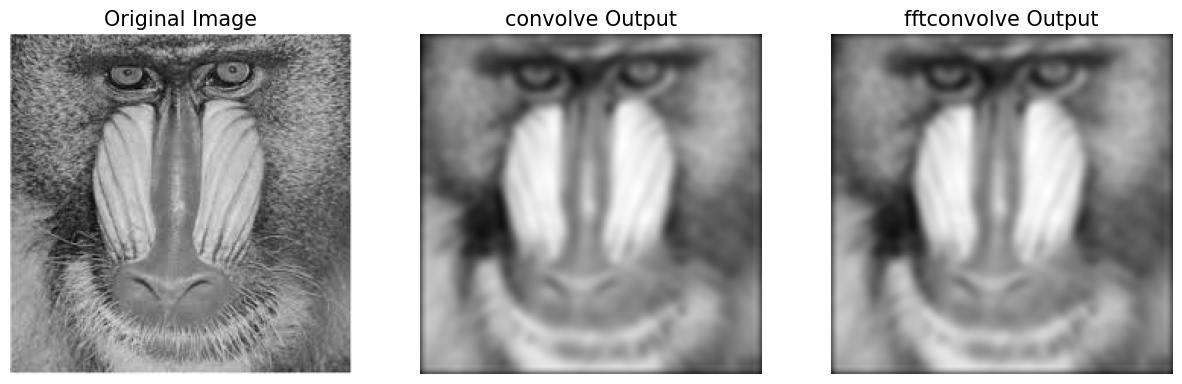

In [37]:
from PIL import Image
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import timeit

# Read the image using Pillow
im = np.array(Image.open('./mandrill.jpg').convert('RGB'))
im = np.mean(im, axis=2)
print(im.shape)  # Verify the shape

# Define the Gaussian kernel
gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3))

# Convolve and FFT-convolve as before
im_blurred1 = signal.convolve(im, gauss_kernel, mode="same")
im_blurred2 = signal.fftconvolve(im, gauss_kernel, mode='same')

# Wrapper function for convolve
def wrapper_convolve(func):
    def wrapped_convolve():
        return func(im, gauss_kernel, mode="same")
    return wrapped_convolve

wrapped_convolve = wrapper_convolve(signal.convolve)
wrapped_fftconvolve = wrapper_convolve(signal.fftconvolve)

# Measure execution times
times1 = timeit.repeat(wrapped_convolve, number=1, repeat=100)
times2 = timeit.repeat(wrapped_fftconvolve, number=1, repeat=100)

# Display the images
plt.figure(figsize=(15, 5))
plt.gray()
plt.subplot(131), plt.imshow(im), plt.title('Original Image', size=15), plt.axis('off')
plt.subplot(132), plt.imshow(im_blurred1), plt.title('convolve Output', size=15), plt.axis('off')
plt.subplot(133), plt.imshow(im_blurred2), plt.title('fftconvolve Output', size=15), plt.axis('off')
plt.show()
